In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

###Image Preprocessing

In [16]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/flowers_Rec2/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 740 files belonging to 5 classes.


###Loading Model

In [17]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

###Visualising and Performing Prediction on Single image

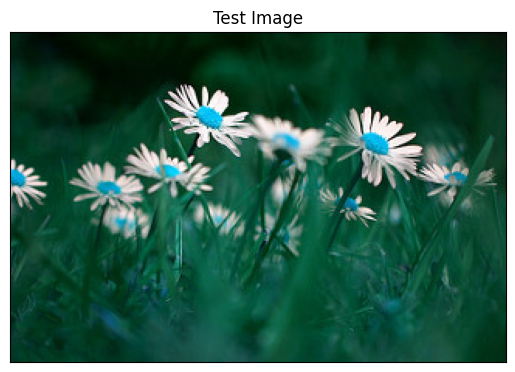

In [18]:
import cv2
image_path = '/content/drive/MyDrive/flowers_Rec2/test/daisy/105806915_a9c13e2106_n.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

###Testing Model

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 384ms/step


In [20]:
#test_set.class_names
print(predictions)

[[7.8753501e-01 3.7593534e-05 2.1239999e-01 1.1430820e-06 2.6309497e-05]]


In [21]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([0]),)


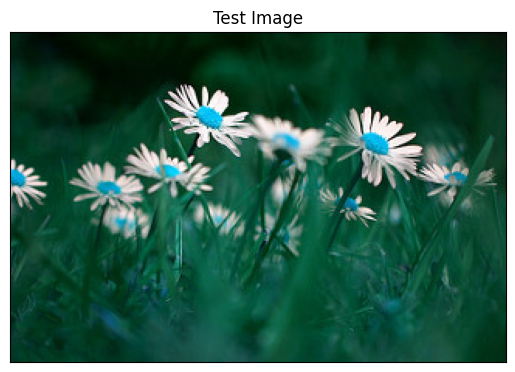

In [22]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a daisy
